Combined DataFrame Preview:
   ATP  Location                Tournament       Date  Series    Court  \
0    1  Adelaide  Adelaide International 1 2022-01-03  ATP250  Outdoor   
1    1  Adelaide  Adelaide International 1 2022-01-03  ATP250  Outdoor   
2    1  Adelaide  Adelaide International 1 2022-01-03  ATP250  Outdoor   
3    1  Adelaide  Adelaide International 1 2022-01-03  ATP250  Outdoor   
4    1  Adelaide  Adelaide International 1 2022-01-04  ATP250  Outdoor   

  Surface      Round  Best of       Winner  ... Lsets    Comment  B365W  \
0    Hard  1st Round      3.0    Kwon S.W.  ...   0.0  Completed   1.61   
1    Hard  1st Round      3.0  Monteiro T.  ...   1.0  Completed   2.30   
2    Hard  1st Round      3.0     Djere L.  ...   0.0  Completed   1.66   
3    Hard  1st Round      3.0   Johnson S.  ...   1.0  Completed   2.00   
4    Hard  1st Round      3.0    Moutet C.  ...   0.0  Completed   2.75   

   B365L   PSW   PSL  MaxW  MaxL  AvgW  AvgL  
0   2.30  1.70  2.26  1.76  2

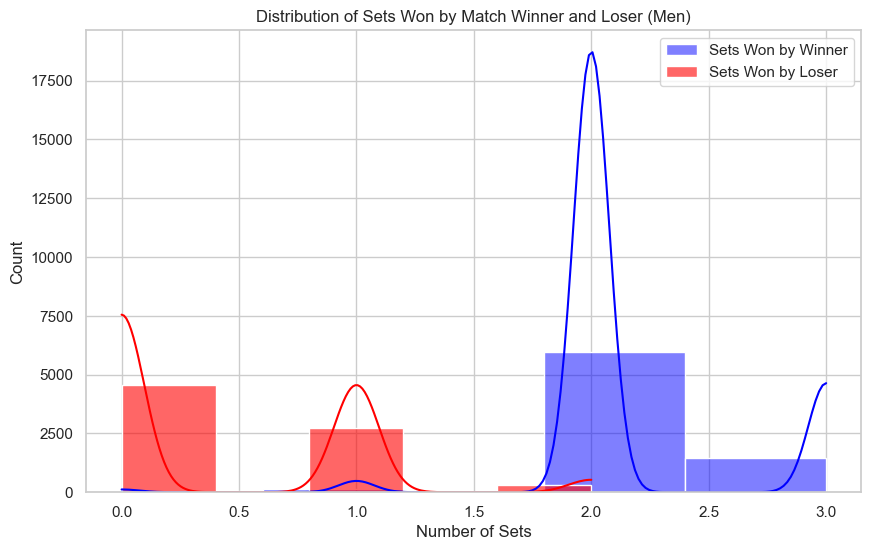

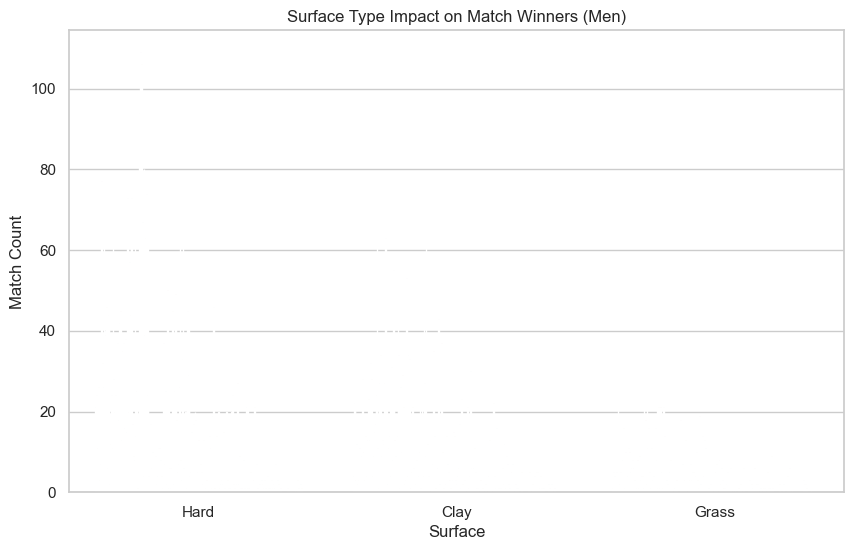

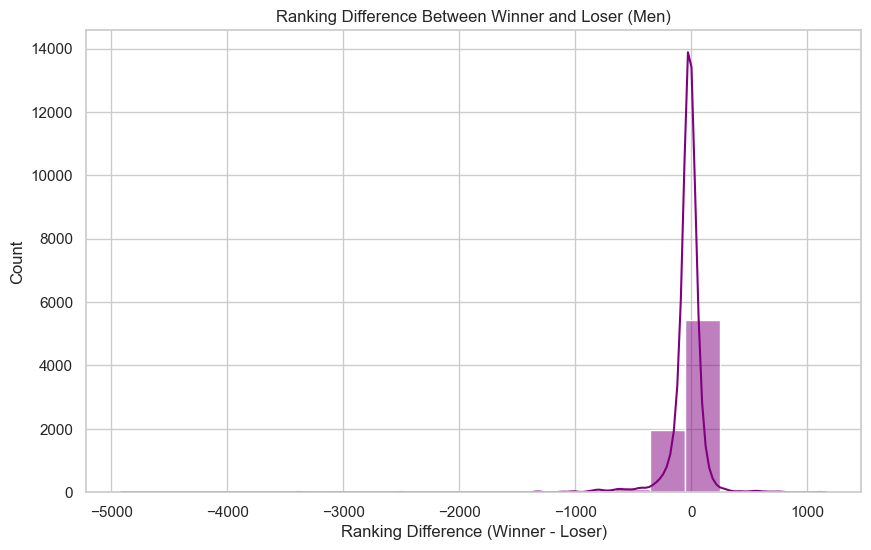

<Figure size 800x600 with 0 Axes>

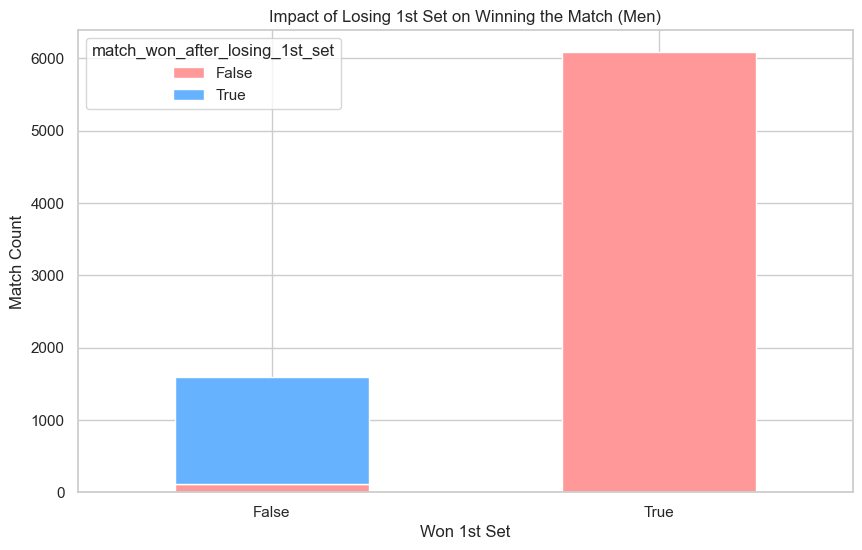

Running EDA for Women's Data:


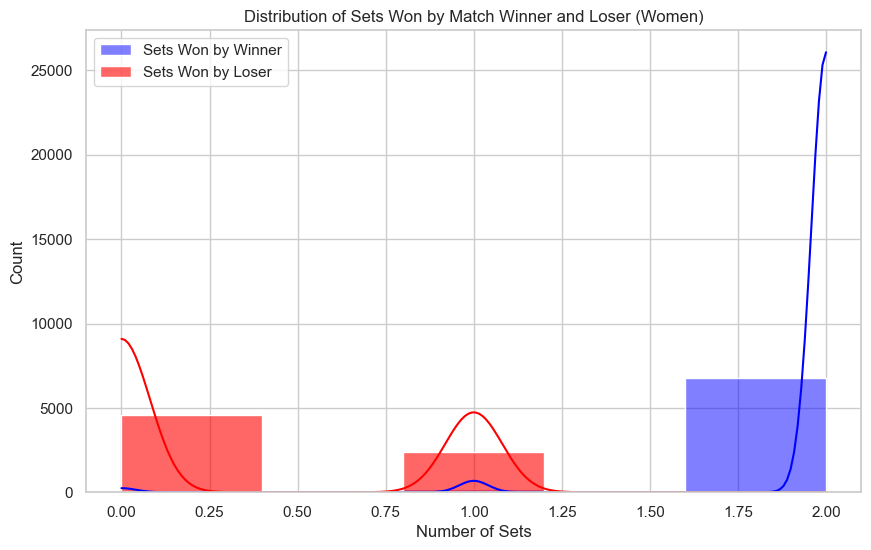

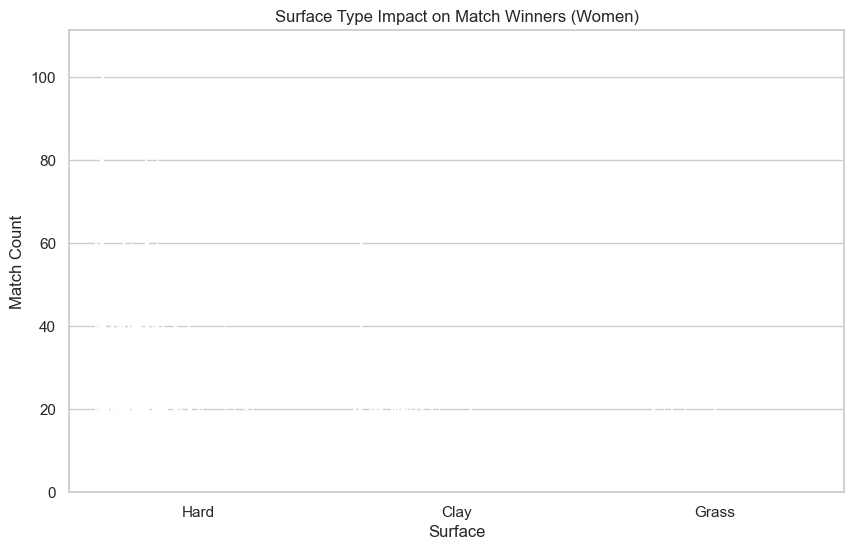

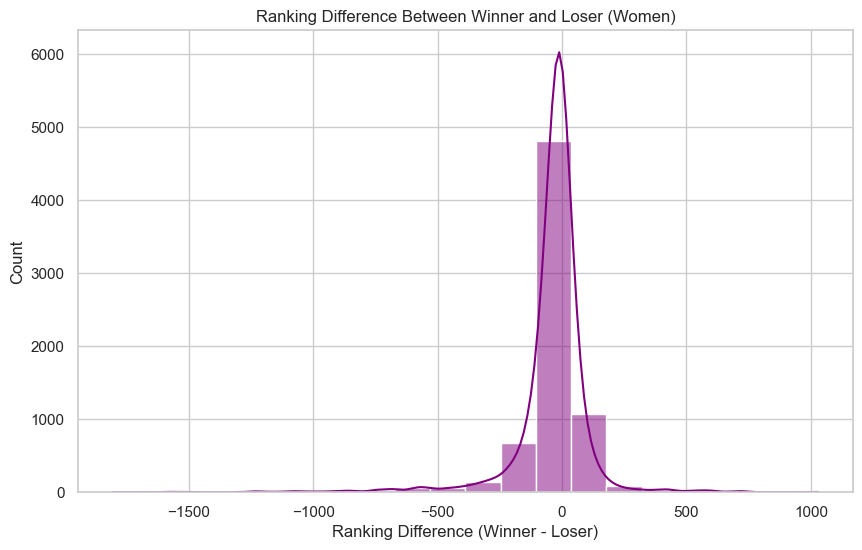

<Figure size 800x600 with 0 Axes>

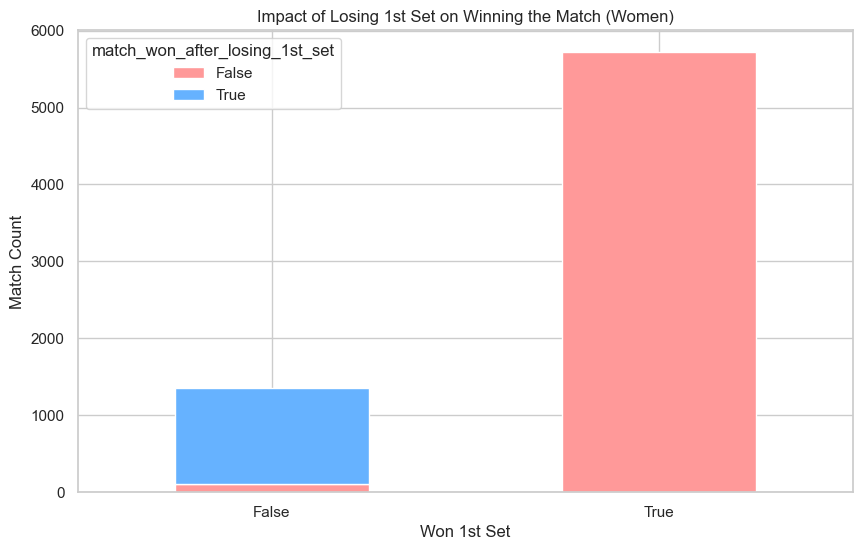

Data loaded, combined, and analyzed successfully!


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_combine_data(file_paths):
    """
    Reads multiple Excel files and combines them into a single DataFrame.
    
    Parameters:
    - file_paths: list of file paths to read.
    
    Returns:
    - combined_df: a combined DataFrame containing data from all the provided files.
    """
    # Read each file into a DataFrame and combine them
    dataframes = [pd.read_excel(file_path) for file_path in file_paths]
    combined_df = pd.concat(dataframes, ignore_index=True)
    
    # Display the first few rows to verify the structure
    print("Combined DataFrame Preview:")
    print(combined_df.head())
    
    return combined_df

def run_eda(df, gender="Men"):
    """
    Performs exploratory data analysis on the provided DataFrame.
    
    Parameters:
    - df: DataFrame to analyze.
    - gender: String indicating whether the data is for 'Men' or 'Women'.
    """
    sns.set(style="whitegrid")
    
    # EDA 1: Distribution of Match Outcomes
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Wsets'], bins=5, color='blue', kde=True, label='Sets Won by Winner')
    sns.histplot(df['Lsets'], bins=5, color='red', kde=True, label='Sets Won by Loser', alpha=0.6)
    plt.title(f'Distribution of Sets Won by Match Winner and Loser ({gender})')
    plt.xlabel('Number of Sets')
    plt.legend()
    plt.show()

    # EDA 2: Surface Impact
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Surface', hue='Winner', order=df['Surface'].value_counts().index, palette='Set3')
    plt.title(f'Surface Type Impact on Match Winners ({gender})')
    plt.xlabel('Surface')
    plt.ylabel('Match Count')
    plt.xticks(rotation=0)
    plt.legend([], [], frameon=False)  # Remove redundant legend
    plt.show()

    # EDA 3: Ranking Difference
    df['rank_difference'] = df['WRank'] - df['LRank']
    plt.figure(figsize=(10, 6))
    sns.histplot(df['rank_difference'], bins=20, kde=True, color='purple')
    plt.title(f'Ranking Difference Between Winner and Loser ({gender})')
    plt.xlabel('Ranking Difference (Winner - Loser)')
    plt.ylabel('Count')
    plt.show()

    # EDA 4: Momentum Shifts - Effect of Losing First Set on Winning the Match
    df['won_1st_set'] = df['W1'] > df['L1']
    df['match_won_after_losing_1st_set'] = ((df['Wsets'] > df['Lsets']) & ~df['won_1st_set'])
    momentum_shift = df.groupby(['won_1st_set', 'match_won_after_losing_1st_set']).size().unstack()

    plt.figure(figsize=(8, 6))
    momentum_shift.plot(kind='bar', stacked=True, color=['#FF9999', '#66B2FF'], figsize=(10, 6))
    plt.title(f'Impact of Losing 1st Set on Winning the Match ({gender})')
    plt.xlabel('Won 1st Set')
    plt.ylabel('Match Count')
    plt.xticks(rotation=0)
    plt.show()

# For men's data
file_paths_men = ['2022.xlsx', '2023.xlsx', '2024.xlsx']
df_combined_men = load_and_combine_data(file_paths_men)

# For women's data
file_paths_women = ['2022_women.xlsx', '2023_women.xlsx', '2024_women.xlsx']
df_combined_women = load_and_combine_data(file_paths_women)

# Run EDA for men's data
print("Running EDA for Men's Data:")
run_eda(df_combined_men, gender="Men")

# Run EDA for women's data
print("Running EDA for Women's Data:")
run_eda(df_combined_women, gender="Women")

print("Data loaded, combined, and analyzed successfully!")


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def run_extended_eda(df, gender="Men"):
    """
    Performs extended exploratory data analysis on the provided DataFrame.
    
    Parameters:
    - df: DataFrame to analyze.
    - gender: String indicating whether the data is for 'Men' or 'Women'.
    """
    sns.set(style="whitegrid")
    
    # EDA 1: Top 20 Rankings
    top_rankings = df[['Winner', 'WRank']].drop_duplicates().sort_values(by='WRank').head(20)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_rankings, x='Winner', y='WRank', palette='viridis', ci=None)  # Set ci=None to remove error bars
    plt.title(f'Top 20 Player Rankings ({gender})')
    plt.xlabel('Player')
    plt.ylabel('Ranking')
    plt.xticks(rotation=45)
    plt.gca().invert_yaxis()  # To show rank 1 at the top
    plt.show()
    
    # EDA 2: Total Games in the Match
    existing_columns = [col for col in ['W1', 'W2', 'W3', 'W4', 'W5', 'L1', 'L2', 'L3', 'L4', 'L5'] if col in df.columns]
    df['total_games'] = df[existing_columns].sum(axis=1)
    
    plt.figure(figsize=(10, 6))
    sns.histplot(df['total_games'], bins=20, color='orange', kde=True)
    plt.title(f'Distribution of Total Games in the Match ({gender})')
    plt.xlabel('Total Games')
    plt.ylabel('Count')
    plt.show()

    # EDA 3: Tiebreak Analysis
    if all(col in df.columns for col in ['W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5']):
        df['tiebreaks'] = df.apply(lambda row: any(score >= 7 for score in 
                                                   [row['W1'], row['L1'], row['W2'], row['L2'], 
                                                    row['W3'], row['L3'], row['W4'], row['L4'], 
                                                    row['W5'], row['L5']]), axis=1)
    else:
        df['tiebreaks'] = False
    
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='tiebreaks', palette='coolwarm')
    plt.title(f'Frequency of Tiebreaks in Matches ({gender})')
    plt.xlabel('Tiebreak Occurred')
    plt.ylabel('Count')
    plt.show()

    # EDA 4: Game Handicap Analysis
    existing_score_columns = [col for col in ['W1', 'W2', 'W3', 'L1', 'L2', 'L3'] if col in df.columns]
    if len(existing_score_columns) > 0:
        df['game_difference'] = (df[[col for col in existing_score_columns if 'W' in col]].sum(axis=1)) - \
                                (df[[col for col in existing_score_columns if 'L' in col]].sum(axis=1))
    else:
        df['game_difference'] = 0
    
    plt.figure(figsize=(10, 6))
    sns.histplot(df['game_difference'], bins=20, kde=True, color='green')
    plt.title(f'Distribution of Game Handicap (Winner vs Loser) ({gender})')
    plt.xlabel('Game Difference')
    plt.ylabel('Count')
    plt.show()

Data cleaning and handling of missing values completed successfully.
Running Extended EDA for Men's Data:


C:\Users\dagbo_b40tnyc\AppData\Local\Temp\ipykernel_39340\2170905147.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=top_rankings, x='Winner', y='WRank', palette='viridis', ci=None)  # Set ci=None to remove error bars
C:\Users\dagbo_b40tnyc\AppData\Local\Temp\ipykernel_39340\2170905147.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_rankings, x='Winner', y='WRank', palette='viridis', ci=None)  # Set ci=None to remove error bars


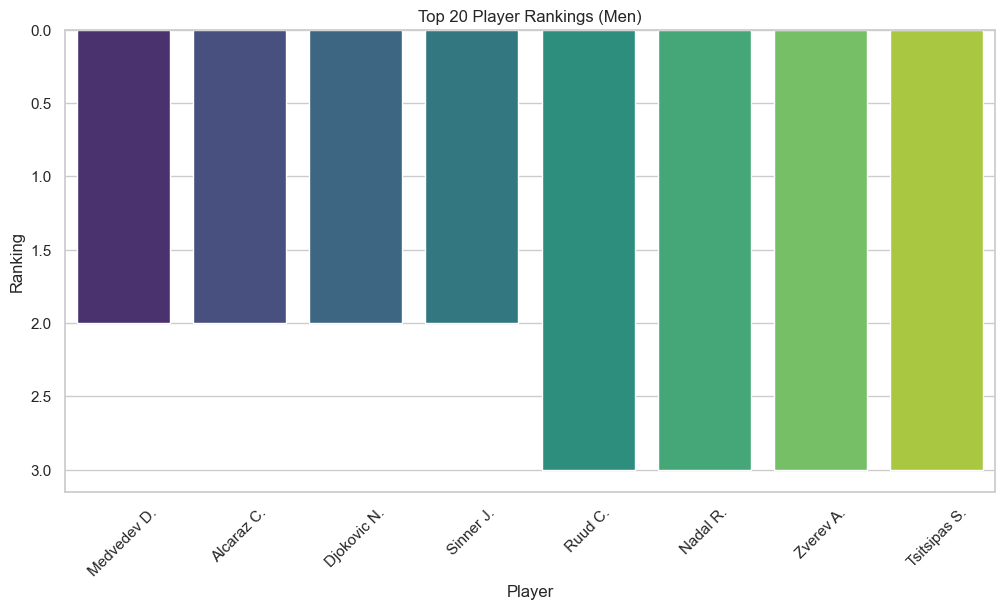

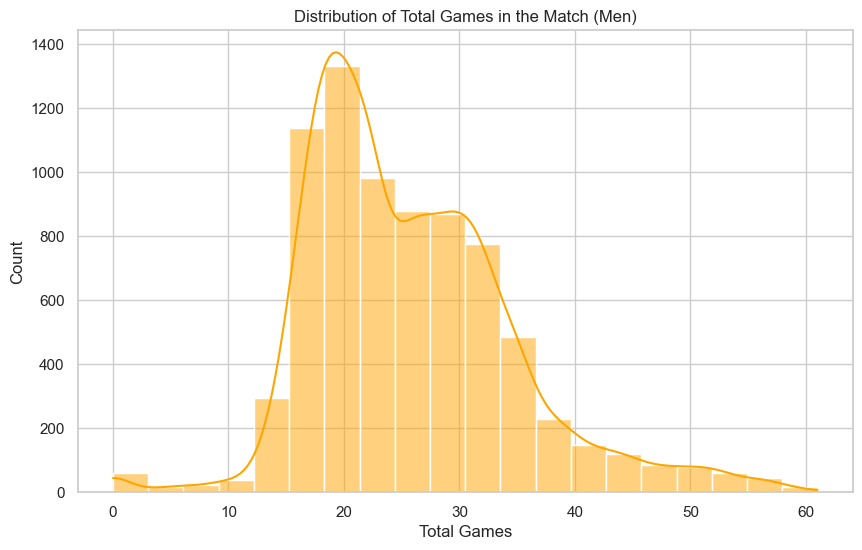

C:\Users\dagbo_b40tnyc\AppData\Local\Temp\ipykernel_39340\2170905147.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='tiebreaks', palette='coolwarm')


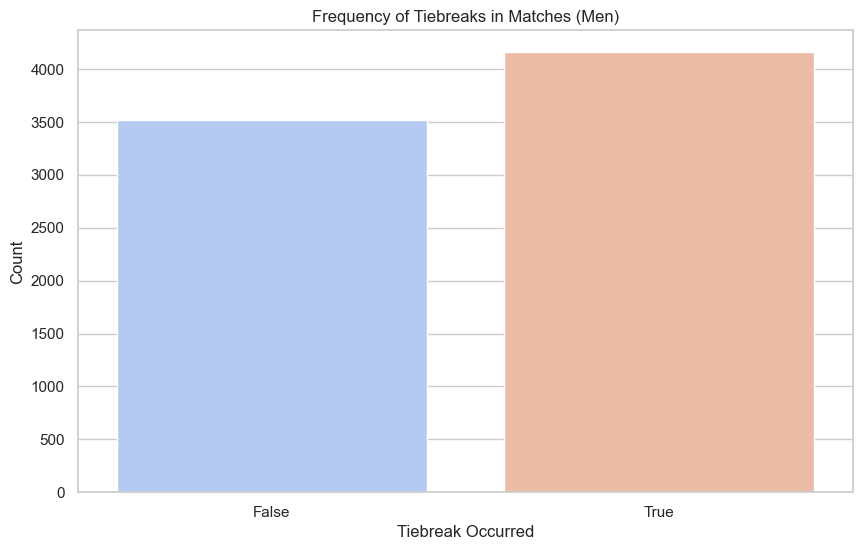

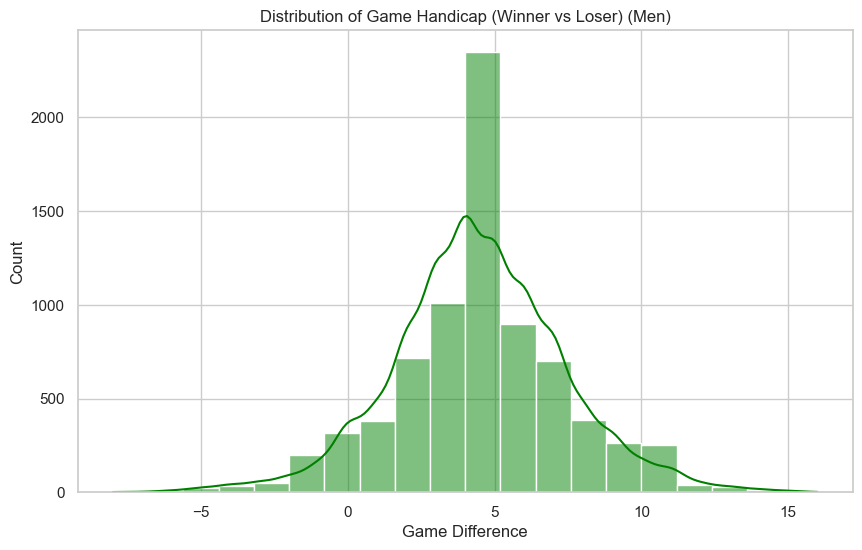

Running Extended EDA for Women's Data:


C:\Users\dagbo_b40tnyc\AppData\Local\Temp\ipykernel_39340\2170905147.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=top_rankings, x='Winner', y='WRank', palette='viridis', ci=None)  # Set ci=None to remove error bars
C:\Users\dagbo_b40tnyc\AppData\Local\Temp\ipykernel_39340\2170905147.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_rankings, x='Winner', y='WRank', palette='viridis', ci=None)  # Set ci=None to remove error bars


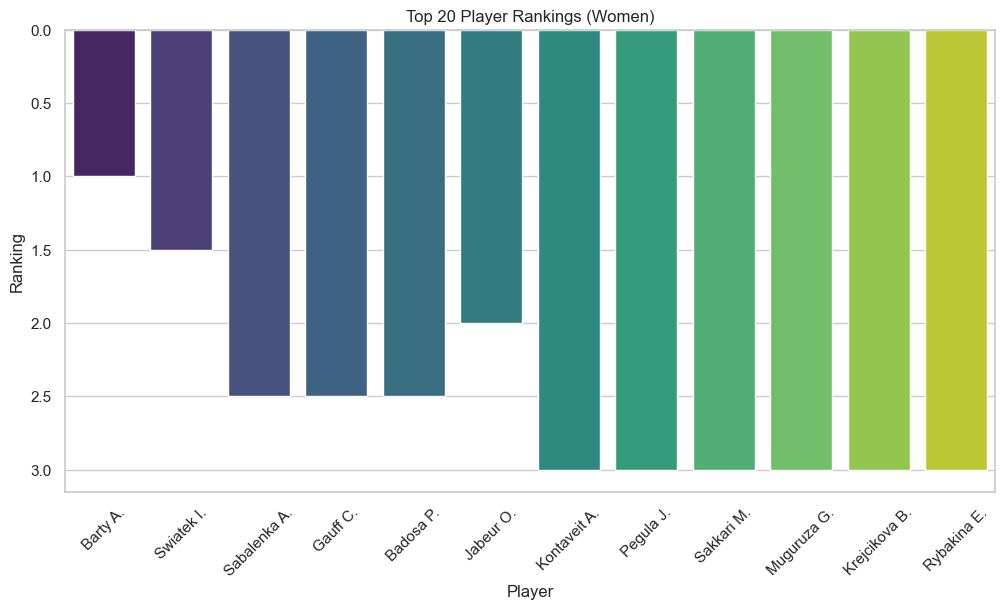

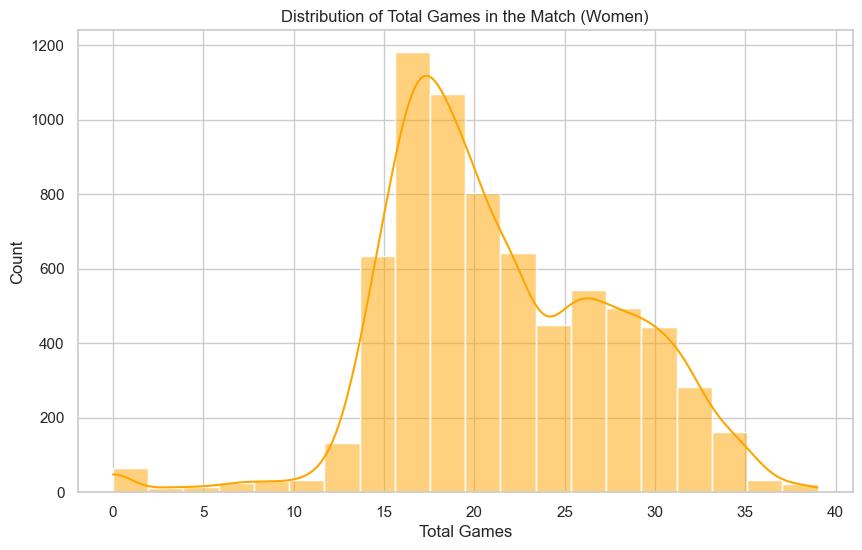

C:\Users\dagbo_b40tnyc\AppData\Local\Temp\ipykernel_39340\2170905147.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='tiebreaks', palette='coolwarm')


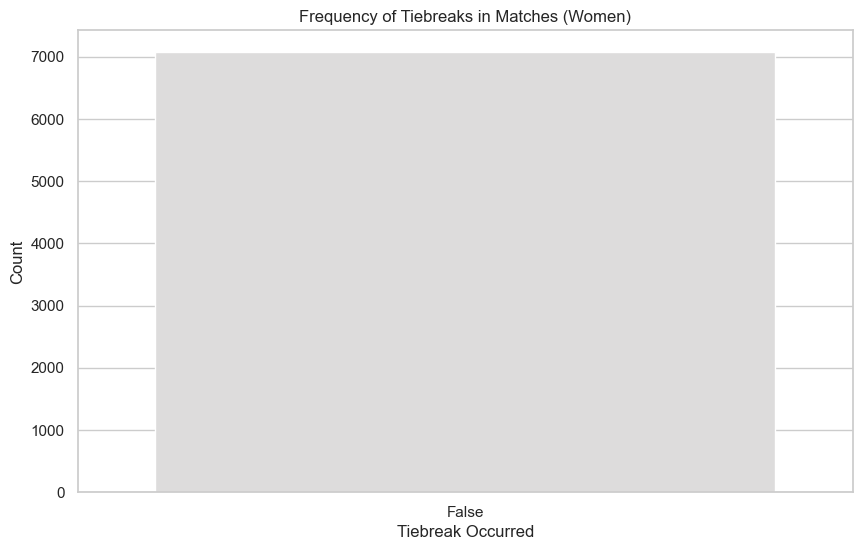

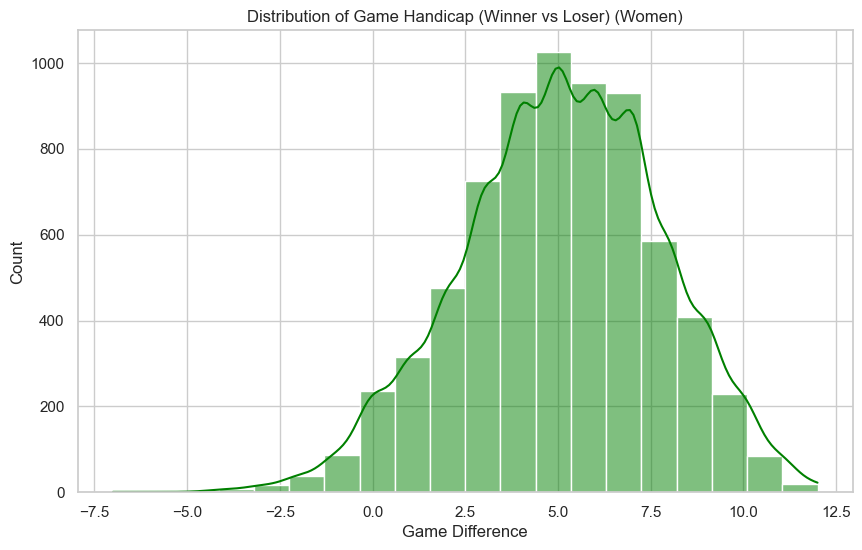

Extended EDA completed for both Men and Women!


In [23]:
def handle_missing_values(df):
    """
    Handle missing values in the DataFrame by filling with appropriate strategies.
    """
    # List of columns to fill with median values
    median_fill_cols = ['Best of', 'WRank', 'LRank', 'WPts', 'LPts', 'Wsets', 'Lsets', 
                        'B365W', 'B365L', 'PSW', 'PSL', 'MaxW', 'MaxL', 'AvgW', 'AvgL']

    # Fill median values only if the column exists in the DataFrame
    for col in median_fill_cols:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].median())

    # List of set score columns to fill with zeros
    set_score_cols = ['W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5']
    
    # Fill zeros only if the column exists in the DataFrame
    for col in set_score_cols:
        if col in df.columns:
            df[col] = df[col].fillna(0)

    # Recalculate 'rank_difference' if 'WRank' and 'LRank' columns exist
    if 'WRank' in df.columns and 'LRank' in df.columns:
        df['rank_difference'] = df['WRank'] - df['LRank']

    return df

def clean_and_handle_missing_values(df):
    """
    Clean data by converting numeric columns, handling non-numeric values, and filling missing values.
    """
    # Convert numeric columns to proper numeric types
    numeric_cols = ['Best of', 'WRank', 'LRank', 'WPts', 'LPts', 'Wsets', 'Lsets',
                    'B365W', 'B365L', 'PSW', 'PSL', 'MaxW', 'MaxL', 'AvgW', 'AvgL',
                    'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5']
    
    # Clean and convert to numeric
    for col in numeric_cols:
        if col in df.columns:
            # Remove non-numeric characters and convert to float
            df[col] = pd.to_numeric(df[col].replace('[^\d\.]', '', regex=True), errors='coerce')

    # Fill missing values after conversion
    df = handle_missing_values(df)

    return df

# Apply the functions to clean and handle missing values for both datasets
df_combined_men = clean_and_handle_missing_values(df_combined_men)
df_combined_women = clean_and_handle_missing_values(df_combined_women)

print("Data cleaning and handling of missing values completed successfully.")

# Run extended EDA for men's data
print("Running Extended EDA for Men's Data:")
run_extended_eda(df_combined_men, gender="Men")

# Run extended EDA for women's data
print("Running Extended EDA for Women's Data:")
run_extended_eda(df_combined_women, gender="Women")

print("Extended EDA completed for both Men and Women!")

In [24]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

def preprocess_and_engineer_features(df):
    """
    Perform data preprocessing and feature engineering on the dataset.
    
    Parameters:
    - df: The DataFrame to preprocess and engineer features.
    
    Returns:
    - df: The processed DataFrame.
    """
    # Step 1: Standardize/Normalize Numeric Features
    numeric_features = ['WRank', 'LRank', 'WPts', 'LPts', 'total_games', 'game_difference']
    scaler = StandardScaler()

    # Only scale if columns exist in the DataFrame
    for col in numeric_features:
        if col in df.columns:
            df[col] = scaler.fit_transform(df[[col]])
    
    # Step 2: Encode Categorical Variables
    # Label encoding for 'Surface' column
    if 'Surface' in df.columns:
        label_encoder = LabelEncoder()
        df['Surface_encoded'] = label_encoder.fit_transform(df['Surface'])

    # One-hot encoding for 'Round' and 'Outcome' columns
    if 'Round' in df.columns:
        df = pd.get_dummies(df, columns=['Round'], prefix='Round')
    
    # Step 3: Feature Engineering
    # 3.1 Head-to-Head Stats (if we have multiple matches between the same players)
    df['head_to_head'] = df.groupby(['Winner', 'Loser']).cumcount() + 1

    # 3.2 Player Form: Calculate recent form based on the last 5 matches
    df['Winner_recent_wins'] = df.groupby('Winner')['Wsets'].rolling(window=5, min_periods=1).sum().reset_index(level=0, drop=True)
    df['Loser_recent_losses'] = df.groupby('Loser')['Lsets'].rolling(window=5, min_periods=1).sum().reset_index(level=0, drop=True)

    # 3.3 Surface-Specific Win Rate: Calculate win rate for players on the given surface
    surface_win_counts = df.groupby(['Winner', 'Surface']).size().unstack(fill_value=0)
    surface_win_totals = surface_win_counts.sum(axis=1)
    df['Winner_surface_win_rate'] = df.apply(
        lambda row: surface_win_counts.loc[row['Winner'], row['Surface']] / surface_win_totals[row['Winner']]
        if row['Winner'] in surface_win_counts.index else 0, axis=1)

    # 3.4 Streaks: Identify if the player is on a winning or losing streak
    df['Winner_streak'] = df.groupby('Winner').cumcount()
    df['Loser_streak'] = df.groupby('Loser').cumcount()

    # 3.5 Match Importance: Encode tournament tier or series
    if 'Tier' in df.columns:
        tier_mapping = {'Grand Slam': 3, 'Masters': 2, 'International': 1, 'WTA500': 2, 'WTA1000': 3, 'ATP250': 1}
        df['match_importance'] = df['Tier'].map(tier_mapping).fillna(0)
    
    return df

# Apply the preprocessing and feature engineering function to both datasets
df_combined_men = preprocess_and_engineer_features(df_combined_men)
df_combined_women = preprocess_and_engineer_features(df_combined_women)

print("Preprocessing and feature engineering completed successfully.")


Preprocessing and feature engineering completed successfully.


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

def preprocess_data_for_modeling(df):
    """
    Preprocess the DataFrame to convert categorical and datetime features to numeric.
    """
    # Drop non-useful columns
    drop_columns = ['Location', 'Tournament', 'Comment']
    df = df.drop(columns=[col for col in drop_columns if col in df.columns])
    
    # Label Encode categorical columns
    label_encode_columns = ['Series', 'Court', 'Surface']
    for col in label_encode_columns:
        if col in df.columns:
            df[col] = LabelEncoder().fit_transform(df[col].astype(str))
    
    # Convert Date to numeric features if available
    if 'Date' in df.columns and pd.api.types.is_datetime64_any_dtype(df['Date']):
        df['Year'] = df['Date'].dt.year
        df['Month'] = df['Date'].dt.month
        df['Day'] = df['Date'].dt.day
        df = df.drop(columns=['Date'])
    
    # Fill any remaining missing values
    df = df.fillna(0)
    
    return df

def advanced_data_splitting(X, y, n_splits=5):
    """
    Perform Stratified K-Fold Cross-Validation splitting.
    """
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    stratified_splits = skf.split(X, y)
    return stratified_splits

def train_ensemble_models(X_train, y_train):
    """
    Train an ensemble of models (XGBoost, CatBoost, RandomForest, SVM, Logistic Regression).
    """
    # Define individual models
    model1 = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
    model2 = CatBoostClassifier(random_state=42, verbose=0)
    model3 = RandomForestClassifier(random_state=42)
    model4 = SVC(probability=True, random_state=42)
    model5 = LogisticRegression(max_iter=1000, random_state=42)
    
    # Create a Voting Ensemble
    ensemble = VotingClassifier(estimators=[
        ('xgb', model1), 
        ('cat', model2), 
        ('rf', model3), 
        ('svc', model4), 
        ('lr', model5)
    ], voting='soft')
    
    # Fit the ensemble model
    ensemble.fit(X_train, y_train)
    
    return ensemble

def evaluate_model_performance_extended(model, X_test, y_test):
    """
    Evaluate model performance using multiple metrics.
    """
    # Make predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Evaluation metrics
    accuracy = model.score(X_test, y_test)
    roc_auc = roc_auc_score(y_test, y_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    # Print metrics
    print(f"Model Accuracy: {accuracy * 100:.2f}%")
    print(f"ROC-AUC Score: {roc_auc:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", cm)

# Preprocess the data
df_combined_men = preprocess_data_for_modeling(df_combined_men)

# Split the data into features and target for modeling
df_combined_men['Match_Outcome'] = (df_combined_men['Wsets'] > df_combined_men['Lsets']).astype(int)
X_men = df_combined_men.drop(columns=['Winner', 'Loser', 'Match_Outcome'])
y_men = df_combined_men['Match_Outcome']

# Check for class imbalance
class_counts = y_men.value_counts()
print("Class distribution:\n", class_counts)

# Optionally handle class imbalance using SMOTE
if class_counts.min() / class_counts.max() < 0.5:
    smote = SMOTE(random_state=42)
    X_men, y_men = smote.fit_resample(X_men, y_men)
    print("Applied SMOTE to balance the classes.")

# Stratified K-Fold cross-validation
splits = advanced_data_splitting(X_men, y_men)

# Perform cross-validation and evaluate models
for train_idx, test_idx in splits:
    X_train, X_test = X_men.iloc[train_idx], X_men.iloc[test_idx]
    y_train, y_test = y_men.iloc[train_idx], y_men.iloc[test_idx]
    
    # Train ensemble models
    ensemble_model = train_ensemble_models(X_train, y_train)
    
    # Evaluate performance with extended metrics
    evaluate_model_performance_extended(ensemble_model, X_test, y_test)


Class distribution:
 Match_Outcome
1    7592
0      84
Name: count, dtype: int64
Applied SMOTE to balance the classes.


C:\Users\dagbo_b40tnyc\OneDrive\all_leagues _prediction\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:09:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Accuracy: 100.00%
ROC-AUC Score: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1518
           1       1.00      1.00      1.00      1519

    accuracy                           1.00      3037
   macro avg       1.00      1.00      1.00      3037
weighted avg       1.00      1.00      1.00      3037

Confusion Matrix:
 [[1518    0]
 [   0 1519]]


C:\Users\dagbo_b40tnyc\OneDrive\all_leagues _prediction\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:11:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Accuracy: 99.97%
ROC-AUC Score: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1518
           1       1.00      1.00      1.00      1519

    accuracy                           1.00      3037
   macro avg       1.00      1.00      1.00      3037
weighted avg       1.00      1.00      1.00      3037

Confusion Matrix:
 [[1517    1]
 [   0 1519]]


C:\Users\dagbo_b40tnyc\OneDrive\all_leagues _prediction\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:12:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Accuracy: 100.00%
ROC-AUC Score: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1519
           1       1.00      1.00      1.00      1518

    accuracy                           1.00      3037
   macro avg       1.00      1.00      1.00      3037
weighted avg       1.00      1.00      1.00      3037

Confusion Matrix:
 [[1519    0]
 [   0 1518]]


C:\Users\dagbo_b40tnyc\OneDrive\all_leagues _prediction\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:13:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
